## Import Module

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

Read The First 5 Data

In [2]:
df = pd.read_excel("UPI Transactions.xlsx")
df.head()

,TransactionID,TransactionDate,Amount,BankNameSent,BankNameReceived,RemainingBalance,City,Gender,TransactionType,Status,TransactionTime,DeviceType,PaymentMethod,MerchantName,Purpose,CustomerAge,PaymentMode,Currency,CustomerAccountNumber,MerchantAccountNumber
0,TXN00001,2024-02-02,271.64,SBI Bank,HDFC Bank,5557.02,Delhi,Female,Transfer,Success,17:12:14,Tablet,Phone Number,Amazon,Food,21,Scheduled,USD,123456789013,987654321013
1,TXN00002,2024-03-03,1064.63,ICICI Bank,SBI Bank,9753.32,Bangalore,Male,Payment,Success,11:15:02,Laptop,QR Code,Zomato,Travel,22,Instant,EUR,123456789014,987654321014
2,TXN00003,2024-04-04,144.15,Axis Bank,Axis Bank,7597.35,Hyderabad,Female,Transfer,Success,21:29:39,Mobile,UPI ID,Swiggy,Bill Payment,23,Scheduled,GBP,123456789015,987654321015
3,TXN00004,2024-05-05,612.89,HDFC Bank,ICICI Bank,2327.84,Mumbai,Male,Payment,Success,06:27:36,Tablet,Phone Number,IRCTC,Others,24,Instant,INR,123456789016,987654321016
4,TXN00005,2024-06-06,743.32,SBI Bank,HDFC Bank,1136.84,Delhi,Female,Transfer,Failed,02:06:22,Laptop,QR Code,Flipkart,Shopping,25,Scheduled,USD,123456789017,987654321017


Check Columns and Rows Of The Dataset

In [3]:
print(f"Row of the dataset: {df.shape[0]}")
print(f"Column of the dataset: {df.shape[1]}")

Row of the dataset: 20000
Column of the dataset: 20


Check Type Data of each columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   TransactionID          20000 non-null  object        
 1   TransactionDate        20000 non-null  datetime64[ns]
 2   Amount                 20000 non-null  float64       
 3   BankNameSent           20000 non-null  object        
 4   BankNameReceived       20000 non-null  object        
 5   RemainingBalance       20000 non-null  float64       
 6   City                   20000 non-null  object        
 7   Gender                 20000 non-null  object        
 8   TransactionType        20000 non-null  object        
 9   Status                 20000 non-null  object        
 10  TransactionTime        20000 non-null  object        
 11  DeviceType             20000 non-null  object        
 12  PaymentMethod          20000 non-null  object        
 13  M

Descriptive Statistics

In [5]:
df.describe()

,TransactionDate,Amount,RemainingBalance,CustomerAge,CustomerAccountNumber,MerchantAccountNumber
count,20000,20000.000000,20000.000000,20000.000000,2.000000e+04,2.000000e+04
mean,2024-06-30 19:36:37.440000,993.613702,5020.540871,39.500000,1.234568e+11,9.876543e+11
min,2024-01-01 00:00:00,0.050000,0.530000,20.000000,1.234568e+11,9.876543e+11
25%,2024-04-02 00:00:00,498.075000,2528.485000,29.750000,1.234568e+11,9.876543e+11
50%,2024-06-30 00:00:00,983.395000,5024.515000,39.500000,1.234568e+11,9.876543e+11
75%,2024-09-27 00:00:00,1494.380000,7531.245000,49.250000,1.234568e+11,9.876543e+11
max,2024-12-30 00:00:00,1999.870000,9999.470000,59.000000,1.234568e+11,9.876543e+11
std,NaN,576.255695,2893.603425,11.543685,5.773647e+03,5.773647e+03


Find Missing and Duplicated Values

In [6]:
print(f"Missing Values : \n{df.isnull().sum()}\n")
print(f"Duplicated Data : {df.duplicated().sum()}")

Missing Values : 
TransactionID            0
TransactionDate          0
Amount                   0
BankNameSent             0
BankNameReceived         0
RemainingBalance         0
City                     0
Gender                   0
TransactionType          0
Status                   0
TransactionTime          0
DeviceType               0
PaymentMethod            0
MerchantName             0
Purpose                  0
CustomerAge              0
PaymentMode              0
Currency                 0
CustomerAccountNumber    0
MerchantAccountNumber    0
dtype: int64

Duplicated Data : 0


Split Columns Into Numerical dan Categorical

In [7]:
numerical_features = df.select_dtypes(include="number").columns
categorical_features = df.select_dtypes(include="object").columns
print(f"Numerical features: {", ".join(list(numerical_features))}")
print(f"Categorical features: {", ".join(list(categorical_features))}")

Numerical features: Amount, RemainingBalance, CustomerAge, CustomerAccountNumber, MerchantAccountNumber
Categorical features: TransactionID, BankNameSent, BankNameReceived, City, Gender, TransactionType, Status, TransactionTime, DeviceType, PaymentMethod, MerchantName, Purpose, PaymentMode, Currency


## Univariate Analysis

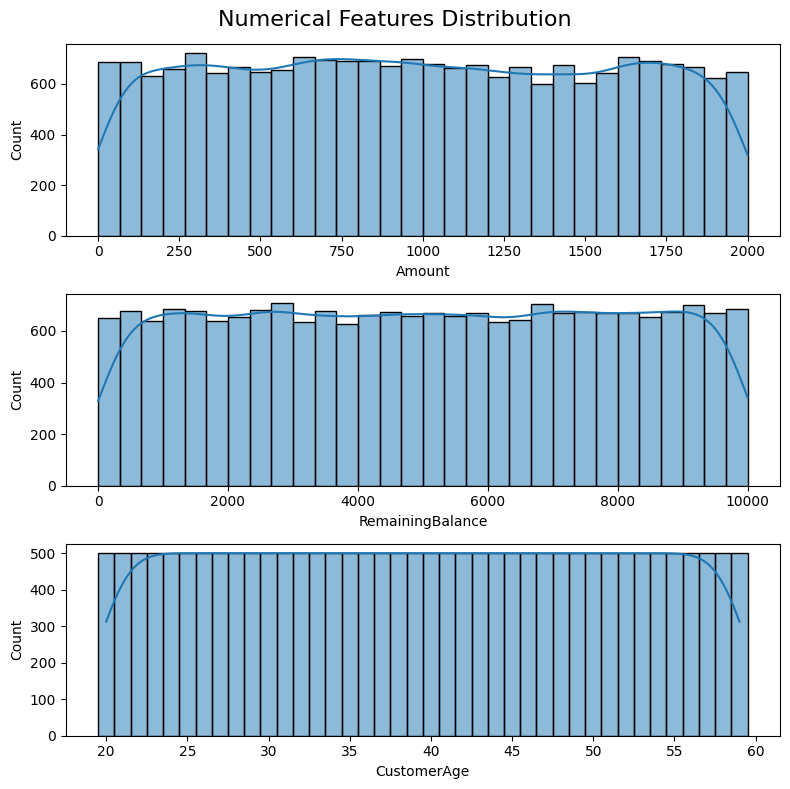

In [8]:
cols = ["Amount", "RemainingBalance", "CustomerAge"]

plt.figure(figsize=(8,8))
plt.suptitle("Numerical Features Distribution", fontsize=16)
for index, col in enumerate(cols):
    is_discrete = True if col == "CustomerAge" else False
    ax = plt.subplot(3,1, index+1)
    sns.histplot(df[col], bins=30, kde=True, ax=ax, discrete=is_discrete)
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

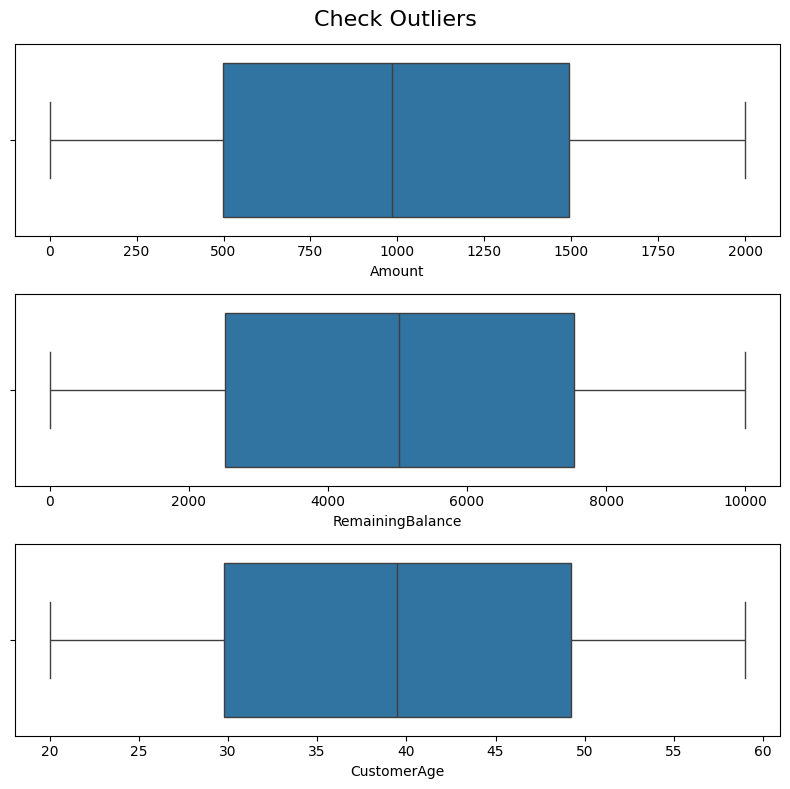

In [9]:
cols = ["Amount", "RemainingBalance", "CustomerAge"]

plt.figure(figsize=(8,8))
plt.suptitle("Check Outliers", fontsize=16)
for index, col in enumerate(cols):
    ax = plt.subplot(3,1, index+1)
    sns.boxplot(x=df[col], ax=ax)
plt.tight_layout()
plt.show()

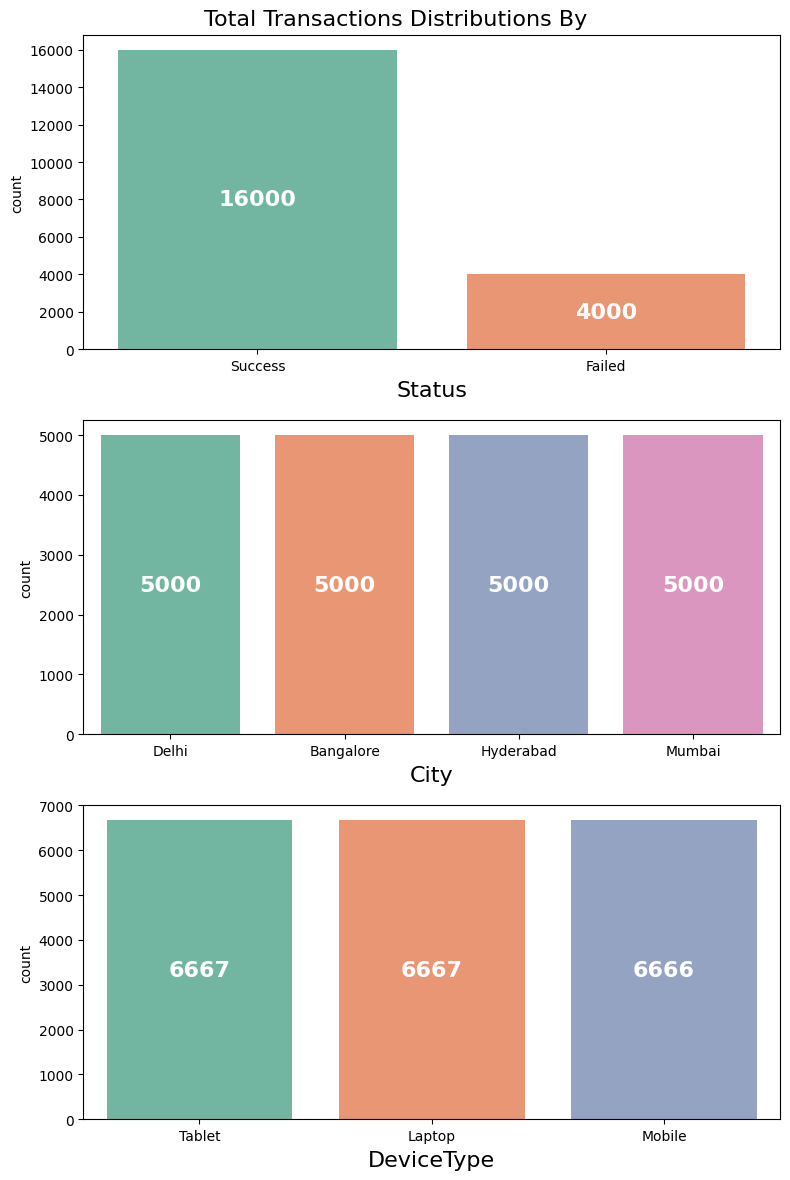

In [21]:
cols = ["Status", "City", "DeviceType"]
plt.figure(figsize=(8,12))
plt.suptitle(f"Total Transactions Distributions By", fontsize=16)
for index, col in enumerate(cols):
    ax = plt.subplot(3,1, index+1)
    ax_data = sns.countplot(data=df, x=col, hue=col, ax=ax, palette="Set2")
    for data in ax_data.containers:
        ax_data.bar_label(
            data,
            fontsize=16,
            fontweight="bold",
            color="white",
            label_type="center",
        )
    plt.xlabel(f"{col}", fontsize=16, labelpad=5) 
    plt.tight_layout(pad=5.0)
plt.tight_layout()
plt.show()

## Bivariate Analysis

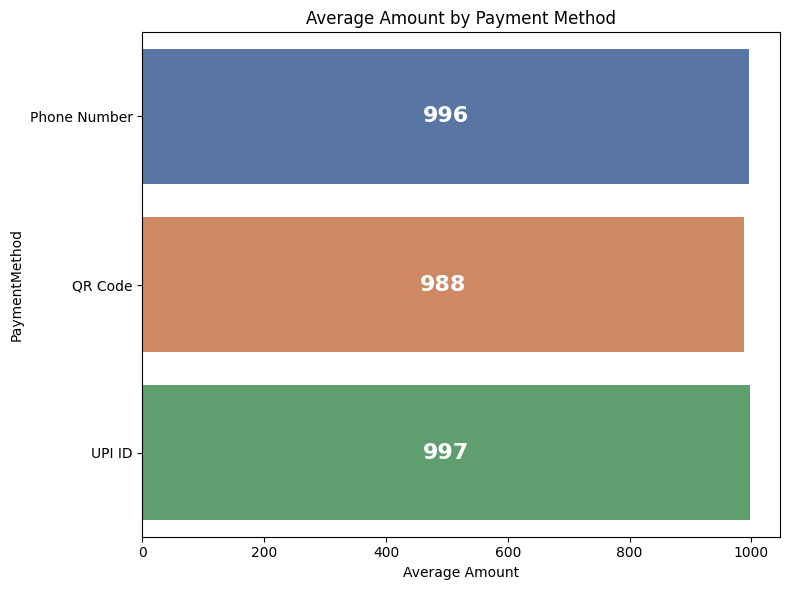

In [11]:
payment_by_amount = df.groupby("PaymentMethod")["Amount"].mean().round(0)

plt.figure(figsize=(8,6))
plt.title("Average Amount by Payment Method")
ax = sns.barplot(
    y=payment_by_amount.index, 
    x=payment_by_amount.values, 
    hue=payment_by_amount.index,
    palette="deep"
)
for data in ax.containers:
    ax.bar_label(
        data, 
        color="white", 
        label_type="center", 
        fontweight="bold", 
        fontsize=16
    )
plt.xlabel("Average Amount")
plt.tight_layout()
plt.show()
# print(avg_gender_transaction)

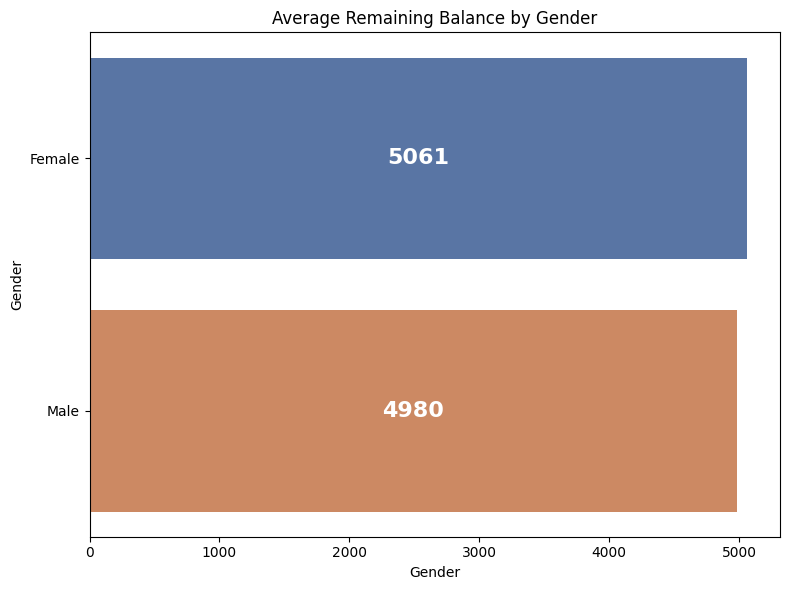

In [12]:
avg_gender_transactions = df.groupby("Gender")["RemainingBalance"].mean().round(0)
plt.figure(figsize=(8,6))
plt.title("Average Remaining Balance by Gender")
ax = sns.barplot(
    y=avg_gender_transactions.index, 
    x=avg_gender_transactions.values, 
    hue=avg_gender_transactions.index,
    palette="deep"
)
for data in ax.containers:
    ax.bar_label(
        data, 
        color="white", 
        label_type="center", 
        fontweight="bold", 
        fontsize=16
    )
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

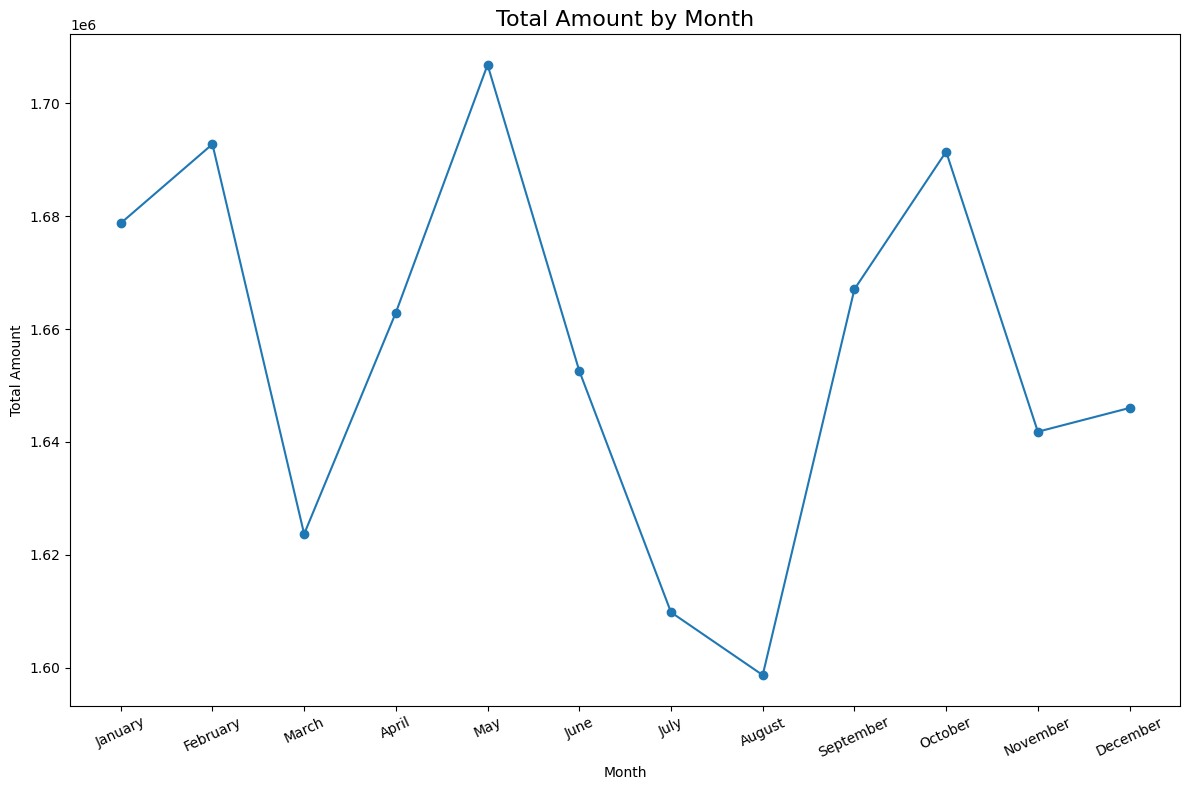

In [13]:
df_plot = df.copy()
df_plot["Month"] = df_plot["TransactionDate"].dt.month_name()
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
df_plot = (
    df_plot.groupby("Month", as_index=False)["Amount"].sum()
    .assign(Month=lambda x: pd.Categorical(x["Month"], categories=month_order, ordered=True))
    .sort_values("Month")
)
plt.figure(figsize=(12,8))
plt.title("Total Amount by Month", fontsize=16)
plt.plot(df_plot["Month"], df_plot["Amount"], marker='o')
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

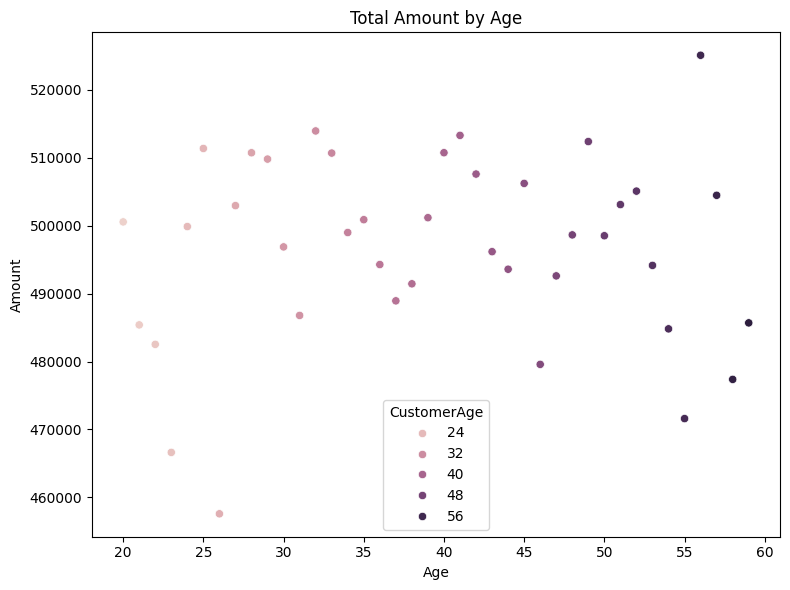

In [14]:
sum_amount_by_age = df.groupby("CustomerAge")["Amount"].sum()
plt.figure(figsize=(8,6))
plt.title("Total Amount by Age")
sns.scatterplot( 
    x=sum_amount_by_age.index, 
    y=sum_amount_by_age.values,
    hue=sum_amount_by_age.index
)
plt.xlabel("Age")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()

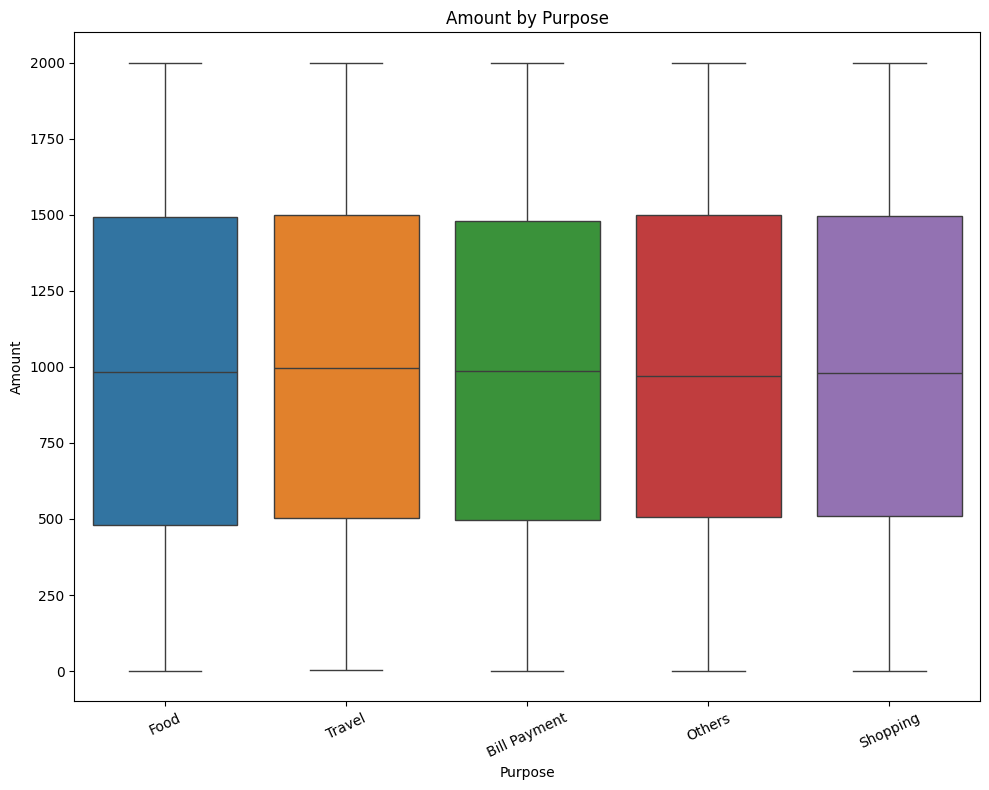

In [15]:
plt.figure(figsize=(10,8))
plt.title("Amount by Purpose")
sns.boxplot(data=df, x="Purpose", y="Amount", hue="Purpose")
plt.xticks(rotation=25)
plt.xlabel("Purpose")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()

## Multivariate Analysis

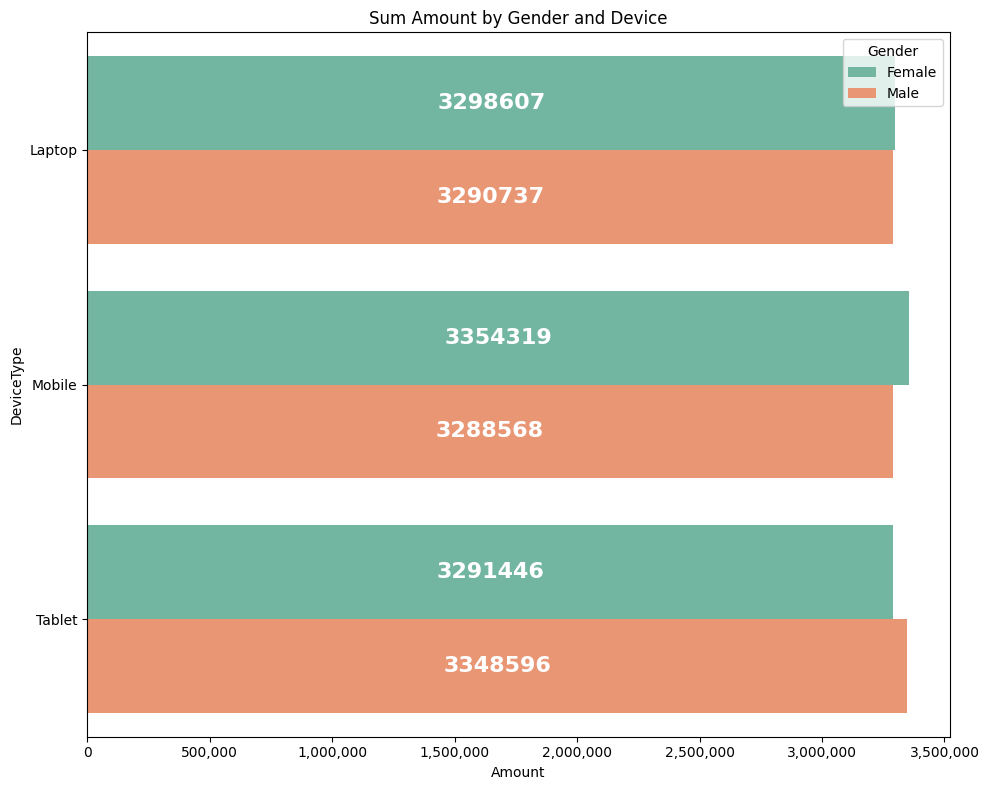

In [16]:
gender_device_by_amount = df.groupby(["Gender", "DeviceType"], as_index=False)["Amount"].sum()

plt.figure(figsize=(10,8))
plt.title("Sum Amount by Gender and Device")
ax = sns.barplot(
    data=gender_device_by_amount,
    x="Amount",
    y="DeviceType",
    hue="Gender",
    palette="Set2"
)
for data in ax.containers:
    ax.bar_label(
        data, 
        color="white", 
        label_type="center", 
        fontweight="bold", 
        fontsize=16,
        fmt="%.0f"
    )

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

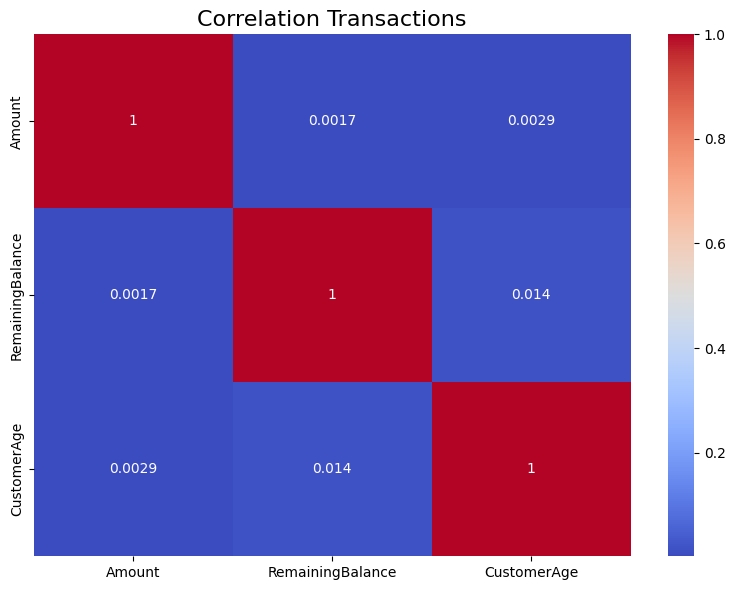

In [17]:
cols = ["Amount", "RemainingBalance", "CustomerAge", ]
plt.figure(figsize=(8,6))
plt.title("Correlation Transactions", fontsize=16)
sns.heatmap(df[cols].corr(), annot=True, fmt=".2g", cmap="coolwarm")
plt.tight_layout()
plt.show()

# Insight
From the analysis above, we can conclude that the most transactions by Amount occurred in May 2024. Women had a higher remaining bank balance than men. They used three types of devices for transactions, with nearly equal totals. Women more often used mobile phones and laptops, while men used tablets. In 2024, there were 4,000 failed transactions. The solution may require further system improvements.

----

# Export Data For SQL and ML

In [18]:
df_customer = df[["CustomerAccountNumber", "Gender", "CustomerAge", "City", "RemainingBalance"]]
df_merchant = df[["MerchantAccountNumber", "MerchantName"]]
df_transactions = df.drop(columns=["Gender", "City", "RemainingBalance", "MerchantName", "CustomerAge", ], axis=1)

def export_to_csv(**datas):
    for name, df in datas.items():
        df.to_csv(f"{name}.csv", index=False)
    print("Export to CSV Successfully")

export_to_csv(
    df_customer = df_customer, 
    df_merchant = df_merchant, 
    df_transactions = df_transactions
)

Export to CSV Successfully


In [19]:
df_new = df.copy()

df_new["Months"] = df["TransactionDate"].dt.month
df_new["Days"] = df["TransactionDate"].dt.day

df_new["TransactionTime"] = pd.to_datetime(df_new["TransactionTime"], format='%H:%M:%S')
df_new["Hours"] = df_new["TransactionTime"].dt.hour
df_new["Minutes"] = df_new["TransactionTime"].dt.minute

df_new = df_new.drop(
    columns=[
        "TransactionID", 
        "CustomerAccountNumber", 
        "MerchantAccountNumber", 
        "TransactionDate",
        "TransactionTime"
    ], axis=1)

df_new.head()

,Amount,BankNameSent,BankNameReceived,RemainingBalance,City,Gender,TransactionType,Status,DeviceType,PaymentMethod,MerchantName,Purpose,CustomerAge,PaymentMode,Currency,Months,Days,Hours,Minutes
0,271.64,SBI Bank,HDFC Bank,5557.02,Delhi,Female,Transfer,Success,Tablet,Phone Number,Amazon,Food,21,Scheduled,USD,2,2,17,12
1,1064.63,ICICI Bank,SBI Bank,9753.32,Bangalore,Male,Payment,Success,Laptop,QR Code,Zomato,Travel,22,Instant,EUR,3,3,11,15
2,144.15,Axis Bank,Axis Bank,7597.35,Hyderabad,Female,Transfer,Success,Mobile,UPI ID,Swiggy,Bill Payment,23,Scheduled,GBP,4,4,21,29
3,612.89,HDFC Bank,ICICI Bank,2327.84,Mumbai,Male,Payment,Success,Tablet,Phone Number,IRCTC,Others,24,Instant,INR,5,5,6,27
4,743.32,SBI Bank,HDFC Bank,1136.84,Delhi,Female,Transfer,Failed,Laptop,QR Code,Flipkart,Shopping,25,Scheduled,USD,6,6,2,6


In [20]:
file_name = "dataset_for_ML"
df_new.to_csv(f"{file_name}.csv", index=False)
print(f"Sucess export {file_name} to CSV")

Sucess export dataset_for_ML to CSV
